# Sparse Coding Tutorial

The goal of the tutorial is to use Sparse Coding to understand the "features" which make-up handwritten digits. This sort of analysis is common when looking at natural signals (images) and also neuroscience data (LFP).

Most of the code has already been written so you'll be running the code, looking at the plots, and manipulating some of the variables to understand how they affect the results. You should work in small groups (2-3) and go through the different sections of the notebook. Questions are highlighted in <font color='green'>green</font> throughout the notebook.

We'll check-in occasionally to make sure everyone is making progress. Feel free to ask any of us questions.

# Using IPython Notebooks

IPython notebooks are made up of a number of 'cells'. Each cell can either run some python code or contain text.

To run a cell, click on it or move to it with up and down arrows and press 'Shift + Enter'. Alternatively, you can press the 'play' button in the toolbar. Any output from the cell (text or plots) will apprear below the cell after you run it. Try running the cell below!

In [ ]:
print("Hello World!")

Before you can do much in Python, you'll probably need to import one or a few libraries. NumPy is a matrix library that is used in scientific python applications. The 'import X as Y' statement loads a library X under the alias Y.

In [ ]:
import numpy as np

IPython can tell you about the properties of functions and modules/libraries. One way to get this is to 'tab complete'. Given a library, 'np', you can query the function in the library by typing 'np.' and pressing 'Tab'. Give it a try! You need have imported numpy for this information to be available, so before trying this make sure you've executed the previous cell.

In [ ]:
np.

To learn about a function, you can type the function's name then a question mark and run the cell.

In [ ]:
np.zeros?

# Positive Only Sparse Coding on MNIST

This code implements <font color='red'>**Positive Only**</font> <font color='purple'>**Sparse Coding**</font> on the <font color='blue'>**MNIST Dataset**</font>.

Lets break that down! <font color='purple'>

**Sparse Coding**</font> is an algorithm that seeks to disentangle the underlying generative factors of data. The result will be a set of "dictionary elements", akin to neuronal receptive fields, that represent these factors. 
<font color ='green'>**Can you guess what the factors would be for songs? for pictures? the emissions spectra of stars?**</font>
<br><br>
<font color='red'>**Positive-Only**</font> means that we don't allow our coefficients to be negative -- we prevent our neurons from firing "negative spikes" that correspond to the opposite of their receptive field. This makes the math a bit harder, but the results are easier to interpret.

The dataset we are using is called <font color='blue'>**MNIST**</font>, and it's one of the most widely used datatsets in the field of machine learning. It's a collection of hand-written digits, drawn from American high school students and census takers.  <font color ='green'>**Can you think of any applications for an algorithm trained on this dataset?**</font>

Intuitively speaking, the underlying generative factors of digits are pen strokes. That is, when these strokes are combined in the right way, we get digits. We will see that sparse coding discovers this underlying structure.

####Mathematical Interpretation
In sparse coding, we define the following:

$I$ is an image, $D$ is a dictionary of underlying generative factors (each with the same dimensionality as the input), and $A$ the sparse coefficients (one per dictionary element). 

In neuroscience terms, $I$ is our input from the retina, the dictionary $D$ is our set of receptive fields, and the coefficients $A$ are firing rates.

We seek to write the *n*th image, $I_n$, as a weighted sum of the dictionary elements, $D_i$. 

Translating that into math gives us:

$$I_n = D_1 * A_1(I_n) + D_2 * A_2(I_n) + \ldots$$

where the dictionary elements are the same for any image in the data set, and the coefficients, $A$, are different for each image. 

In order to learn the dictionary elements $D$, and the sparse coefficients, $A$, we minimize the following *cost function*, $C$:

$$C = |I - \sum_i A_i * D_i| ^ 2 + \lambda \sum_i A_i $$

where $$ |D_i|^2 = 1$$ and $$ A_i ≥ 0 $$

Note that this is a linear algebraic equation. The matrix $D$ has the shape number of dictionary elements by the number of pixels, which are the lengths of the activation and image vectors, respectively.

Let's look at it piece-by-piece.

A *cost function* is a mathematical construct that assigns a number, the cost, to any given state of our algorithm. The lower the cost is, the closer we are to achieving the goal of our algorithm -- that's why it's also called the *objective function*. It's a creature with many names$^†$!

We have two competing goals, so we have two competing pieces in our cost function.

The first part, $|I - \sum_i A_i * D_i| ^ 2$, takes the dictionary elements, multiplies them by the coefficient values, and then subtracts that away from the image. The result is thus the part of the image that we haven't yet explained, or the *representation* or *reconstruction error*, and it is also the *squared error*.$^*$

The second part, $ \sum_i A_i $, adds up all of our activations. The more active we are, the worse we do on our objective function. This is our *sparseness penalty*.

As I've explained it so far, reconstruction error and sparseness are weighted equally. In different situations, we might wish the make sparseness more or less important. To do this, we multiply the sparseness penalty by a parameter called &lambda;, or "lambda". Note that we could have just as easily multiplied the reconstruction error by a parameter called &zeta;! Higher values of &lambda; mean that we find sparser solutions, but do worse on fatihfully reproducing the input.

Lastly, we have our two constraints. The constraint on $|D_i|^2$ gets rid of a possible redundancy in our equation. Without it, a small dictionary element multiplied by a large sparse coefficient is the same as a large dictionary element multiplied by a small sparse coefficient. By restricting the magnitude of the dictionary elements, we make sure that all the information about intensity goes into the coefficients. The other constraint is our <font color='red'>*positive only* </font> constraint -- activations must be positive!

To minimize this function, we do the following steps:

0. Randomly initialize $D$.

1. Choose a batch of images $I$.

2. Minimize$^‡$ $C$ with respect to $A$, holding $D$ fixed.

3. *Keeping that value of $A$*, change $D$ by a really small amount to reduce the value of $C$.

4. Return to step 2.


#### Neural Interpretation
In addition to being a useful tool for understanding data, sparse coding is also compelling because it provides a principle and a mechanism by which the sensory cortex might learn from stimuli.

Step 3 is analagous to neurons integrating information $I$ and firing action potentials $A$. We call this the **Inference Step**. In the brain, this happens quickly in response to stimuli. Because the brain wishes to accurately represent the outside world, the neurons must seek to minimize the error of their representation, the first part of our equation. 

Because spiking is metabolically expensive (our big brains use up more than 25% of our calories!), we'd like to achieve a good representation with as few spikes as possible. If we do really well (fewer active neurons than pixels in the input), then we've also achieved compression, since our internal representation is smaller than the input. 

If you know a thing or two about information theory, then you might be astounded to discover that such a simple algorithm can discover compression schemes, which usually take very many, very clever computer scientists quite some time. You'll be even more astounded if you compare the results of sparse coding applied to natural images with the .PNG file format for storing images (look at the wavelets). They're incredibly similar!

Step 4 is, then, analogous to synaptic plasticity. We call this the **Learning Step**. It causes changes in the neuronal receptive fields $D$ that allow those neurons to perform better at our stated objective -- the more images, the better. Another bonus question: <font color ='green'> what would happen if we just showed the same image over and over again? </font>

#####Footnotes

<font size ='1'> $^*$ Bonus question: <font color ='green'> why is the error squared? </font> (this is a question with more than one answer, and some of them are quite deep!)

$^†$ There are many uses for this mathematical object, and each use has its own name. Statisticians call it a *loss function*. Economists and utilitarians flip it upside down and call it a *utility function* -- higher is better, so utility is maximized. Physicists use them to describe physical systems, where they become an *energy function*, and energy is always minimized -- balls roll down hills. There's a mathematical connection between all of these, but the math just expresses the way humans think -- magnets "want" to point north, while rational actors are "compelled" towards the optimal solution!
<br> <br>
$^‡$ You could do this with gradient descent, but we'll use a faster method called "FISTA" -- see the appendix to this document if you're curious.

##Let's Get Started!

### Import libraries

We'll need numpy (matrix library) and matplotlib (plotting library) to do most of the heavy lifting. Additionally, we'll use a few tools from scipy (scientific computing) and ones that we've written.

In [2]:
import numpy as np # NUMerical PYthon library, matrix library
import matplotlib # Plotting library
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from scipy.io import loadmat # load .mat files
from scipy.stats import probplot, expon, norm, halfnorm # Stats functionality

from rf_plot import show_fields # code for plotting

from network import Network # code for sparse-coding network

### 1) Load Data
First, we'll load the data and do a little preprocessing.

In [3]:
data_file = "mnist.mat"

data = loadmat(data_file)
IMAGES = data['IMAGES']
LABELS = data['LABELS']

# Set basic parameters
(K, L_img, L_img) = IMAGES.shape
print('Number of images: '+str(K))
K # Number of base images
L_img # Linear size of images from the data
N_pix_img = L_img ** 2

# Scale the images to have a constant standard deviation
IMAGES = IMAGES / np.std(IMAGES.astype(float), axis = (1, 2), keepdims = True)
data = IMAGES.reshape(-1, N_pix_img)
order = np.random.permutation(data.shape[0]) # Permute the data since they are sorted by digit
data = data[order]

Number of images: 60000


Plot a few of the images from the dataset. Each images is a 14 by 14 image of a handwritten digit.

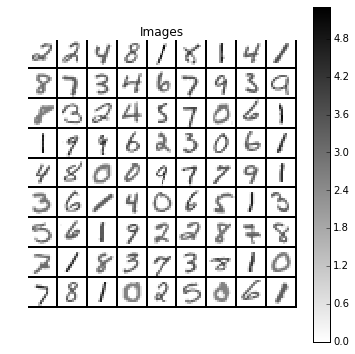

In [4]:
plt.figure(figsize=(6,6))
show_fields(data[:81], cmap='gray_r', pos_only=True)
plt.title('Images')
p = plt.axis('off')

<font color='green' size = '3'> 1) Intuitively, what are handwritten digits 'made' out of?
<br>
2) Why is it okay to combine a collection of positive-only things to make handwritten digits?</font>

### 2) Create Sparse Coding Network
Set some parameters for training the network and create it.

In [19]:

N_sp = 81 # Number of sparse dictionary elements
lamb = 0.5 # Sparsity parameter (0.5 is a good value, too large and you'll get NaNs)
eta = 0.05 # Dictionary Learning Step Size

net = Network(N_sp, N_pix_img, lamb, eta)

Visualize the untrained dictionary

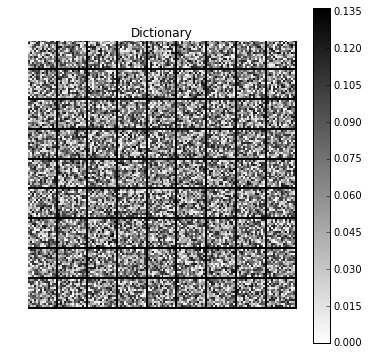

In [20]:
plt.figure(figsize=(6,6))
show_fields(net.D, cmap='gray_r',pos_only = True)
plt.title('Dictionary')
p = plt.axis('off')

Run inference on the network

120.331581648
98.6025479069
97.1594316331
96.6108448247
96.409292476
96.3494705571
96.339221223
96.3407179278
96.3403290849
96.3382732761


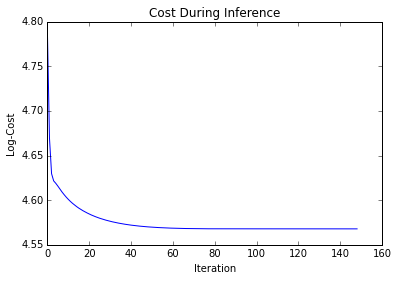

In [21]:
A, costs = net.infer_A(data[0:100], n_g_steps=150, track_cost=True)
plt.plot(np.log(costs))
plt.title('Cost During Inference')
plt.xlabel('Iteration')
p = plt.ylabel('Log-Cost')

<font color='green' size='3'>1) How was the dictionary initialized? What does the dictionary mean? What is the biological analogue for vision?
<br>
2) What is the inference step supposed to do? Is it working?</font>

### 3) Train the Network

Train the network and visualize the dictionary elements.

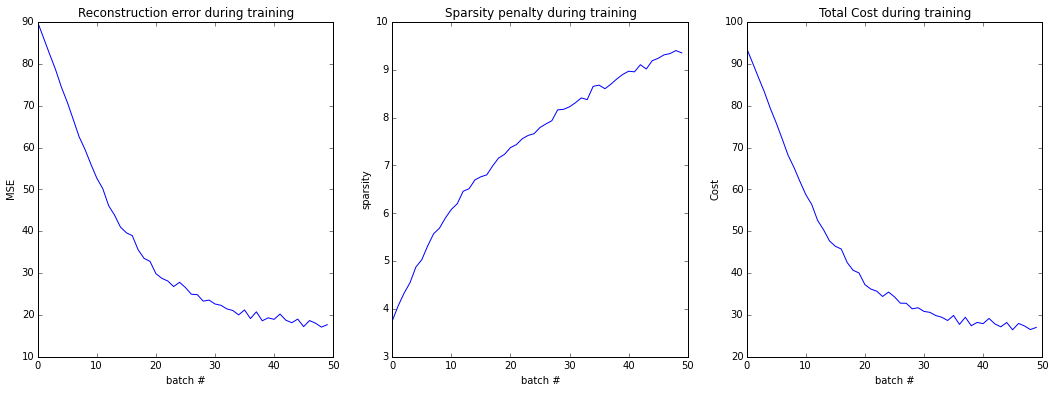

In [22]:
[MSE_hist, sparsity_hist, SNR_hist, cost_hist] = net.train(data, reset=False, batch_size=200, n_batches=50, eta = eta)

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.plot(MSE_hist)
plt.title('Reconstruction error during training')
plt.xlabel('batch #')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(sparsity_hist)
plt.title('Sparsity penalty during training')
plt.xlabel('batch #')
plt.ylabel('sparsity')

plt.subplot(1, 3, 3)
plt.plot(cost_hist)
plt.title('Total Cost during training')
plt.xlabel('batch #')
p = plt.ylabel('Cost')


Plot the dictionary elements. You can go back and run the training again (multiple times) and see how the plots change over time. Once all three plots above have become noisy horizontal lines, learning is complete. Since the right-most plot shows our total error, it is the most important one, and takes the longest to reach completion. You might need to run the training cell many times!

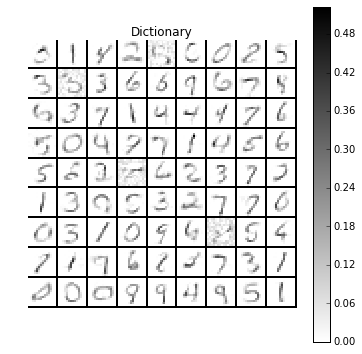

In [23]:
plt.figure(figsize=(6,6))
show_fields(net.D, cmap='gray_r', pos_only=True)
plt.title('Dictionary')
p = plt.axis('off')

<font color='green' size='3'>1) What happens to the reconstruction error, sparsity penalty, and the cost during training?
<br>
2) What do the dictionary elements look like? What happens if you run the training cell multiple times? What happens to the dictionary as you train it more?</font>

### 4) Network Analysis

Since a sparse-coding network tried to reconstruct its input, we should be able to visualize the reconstructions in more detail for a particular image.

You can run the following cell multiple times and it will plot a new image.

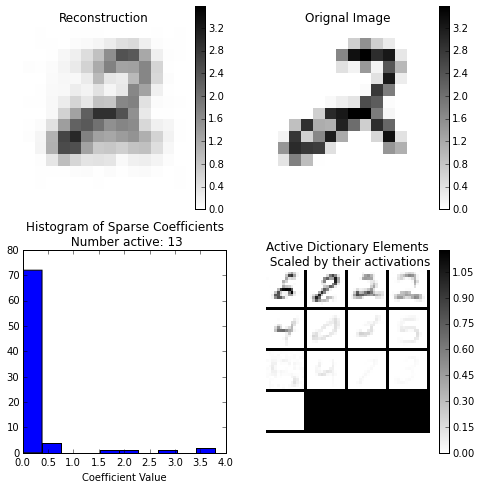

In [24]:
plt.figure(figsize=(8,8))
q = np.random.randint(net.A.shape[0])
plt.subplot(2, 2, 1)
plt.title('Reconstruction')
plt.imshow(net.reconstruct(net.X, net.A)[q].reshape(L_img, L_img),
           interpolation = 'nearest',
           cmap = 'gray_r', vmin = 0, vmax = net.X[q].reshape(L_img, L_img).max())
plt.axis('off')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.title('Orignal Image')
plt.imshow(net.X[q].reshape(L_img, L_img),
           interpolation = 'nearest',
           cmap = 'gray_r')
plt.axis('off')
plt.colorbar()
plt.subplot(2, 2, 3)

plt.hist(net.A[q])

sort_idx = np.argsort(net.A[q])[::-1]
N_active = np.sum(net.A[q] > 0.0)
active_idx = sort_idx[0:N_active]

plt.title('Histogram of Sparse Coefficients \n Number active: %d' % N_active)
plt.xlabel('Coefficient Value')

plt.subplot(2, 2, 4)
show_fields(net.D[active_idx] * 
            net.A[q][active_idx][:, np.newaxis], 
            cmap = 'gray_r', pos_only = True)
plt.title('Active Dictionary Elements \n Scaled by their activations')
p = plt.axis('off')

<font color='green', size='3'>1 ) How well is the network reconstructing the image?
<br>
2) How are the coefficient values distributed? Why are they distributed this way?
<br>
3) How is the bottom-right plot related to the reconstruction?</font>

Look at the joint statistics between different sparse coefficients

In [11]:
n_digits = 10000
A = net.infer_A(data[np.random.randint(0, data.shape[0], n_digits), :])

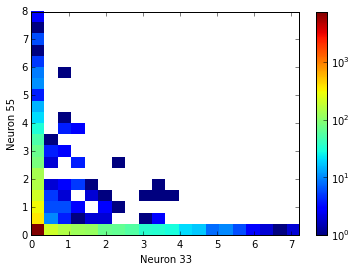

In [12]:
n1, n2 = np.random.permutation(net.A.shape[1])[:2]
_ = plt.hist2d(A[:,n1], A[:,n2], 20, norm=LogNorm())
plt.colorbar()
plt.xlabel('Neuron '+str(n2))
p = plt.ylabel('Neuron '+str(n1))

<font color='green'>1) How are the coefficients distributed? Everytime you run the plot, it will choose a different pair of neurons.
<br>
2) What would this plot look like if the coefficients were from a normal distribution?</font>

To examine the distribution of sparse coefficients (firing rates), we can compare them with different distribution. One tool for doing this is a probability plot. This plot compares the ordered value from the data to the ordered values the distribution. Closer to the red line is better (note the $R^2$ value at the bottom right).

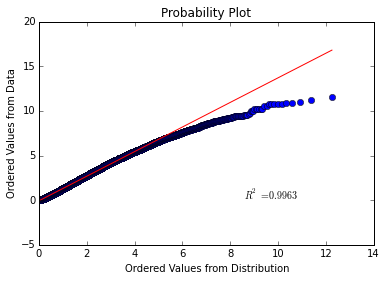

In [13]:
As = net.A.ravel()
p = probplot(As[As > 0], dist=expon, plot=plt)
plt.xlabel('Ordered Values from Distribution')
p = plt.ylabel('Ordered Values from Data')

<font color='green'>1) How well does the distribution line up with samples drawn from an exponential distribution?
<br>
2) How well does it match if you change "expon" to "norm" or "halfnorm"?</font>

# Recap: Changing &lambda;<br>
<font color='green' size ='3'> If you have time left, go back and change &lambda; to be larger or smaller. <br>
1) What happens to the sparsity? What happens to the reconstruction error? <br>
2) What do the dictionaries look like?</font>

#Appendix: Details on FISTA

Since the objective function has an absolute value, typical gradient descent approaches converge slowly. Thus there are special purpose gradient descent methods that minimize functions that are in the form $$f(x) + g(x)$$ where $f(x)$ is a continuously differentiable, convex function and $g(x)$ is a convex, but not continuously differentiable function, such as $g(x) = \alpha |x|$. One such method is called FISTA, or the Fast Iterative Shrinkage-Threshold Algorithm. 

The core kernel of the FISTA algorithm is the ISTA step:

Define
$$p_L(y) = \text{argmin}_x \, g(x) + L/2 * ||x- g(y)||^2$$ where $$g(y) = y - \frac{1}{L} \nabla f(y)$$

and where $L$ is the constant such that $$||\nabla f(x) - \nabla f(y)|| \le L ||x - y||$$

When $g(x) = \alpha|x|_1$, then $$p_L(y) = h_\theta(g(y))\qquad h_\theta(y) = \text{sign}(y)(|y|-\theta)\qquad \theta = \frac{\alpha}{L}$$
$h$ is applied pointwise its input and is called the shrinkage function. Simplying calculating $x_{t+1} = p_L(x_t)$ is the ISTA algorithm. If we more intelligently choose our new value to probe our function, then we get faster convergence. The FISTA algorithm is as follows:

1. Initialize $y_0 = x_0 = X0$, $t_0=1$. 

2. For $k \ge 0$, iterate the following:

$$x_{k+1} = p_L(y_k)\qquad t_{k+1} = 0.5 * (1 + \sqrt{1 + 4 * t_k ^2})\qquad y_{k+1} = x_{k+1} + \frac{t_k - 1}{t_{k+1}} * (x_{k+1} - x_k)$$